Выборка среднегодовых данных по государственным мониторинговым скважинам для СП

In [8]:
#Импорт нужных библиотек. 
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np
import os
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import itertools

In [2]:
# Ипорт базы данных в формат данных "пандас.датафрейфм",
# это 2хмерная матрица с заголовками колонок и индексами строк
conn = db.connect('Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=D:\\Kortunov\\transfer\\Esentuk\\regim_parts\\regim_parts.mdb;')
curs = conn.cursor()#эти штуки нужны для работы с базаой курс - это курсор, просто для перемещения по БД
for row in curs.tables(): #этот цикл пробешает по всем таблицам и пишет их имена, просто для навигации
    print(row.table_name)

MSysAccessObjects
MSysAccessXML
MSysACEs
MSysNavPaneGroupCategories
MSysNavPaneGroups
MSysNavPaneGroupToObjects
MSysNavPaneObjectIDs
MSysObjects
MSysQueries
MSysRelationships
Описание полей базы
Скважины_АО_В РАСЧЕТЫ
Скважины_АО_ТЗ_Устья ВВОД И АНАЛИЗ
Часть 1_Гидродинамика
Часть 2_Химия
Часть 3_Химия_МГУ


In [3]:
tablename = 'ВСЕ ДАННЫЕ'
df_dyn = pd.read_sql_query("SELECT * FROM [Часть 1_Гидродинамика];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_chem = pd.read_sql_query("SELECT * FROM [Часть 2_Химия];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_chem_msu = pd.read_sql_query("SELECT * FROM [Часть 3_Химия_МГУ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_info = pd.read_sql_query("SELECT * FROM [Скважины_АО_В РАСЧЕТЫ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
# и сохраняем ее в пандас.датафйрем. Все, теперь мы можем с ней работать с помощью питона, причем с возможностью использовать силы модуля пандас
#pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)#это опции визуалицации таблицы, в данном случае я прошу ее показать все колонки. 
#это я вывожу на экран датафрейм. Если в питонге пишешь просто переменную по всему, это тоже самое что команда print
curs.close()#закрываю базу данных, все, больше мы ее не используем, а используем первый датафрем где все данные хранятся для этого блокнота
conn.close()

In [4]:
df_dyn

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606
0,1977,1,1,0,0,97,1977-01-01,1.8,NaN,NaN,615.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1977,1,1,0,0,100,1977-01-01,3.3,NaN,NaN,619.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
df_monitoring = df_dyn[(df_dyn['IDPN'] == 72222002)]
df_monitoring

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606
143176,2000,1,11,0,0,72222002,2000-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.559998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143331,2000,1,17,0,0,72222002,2000-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686.760010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

72222002
72620005
72620018
72620020
72620022


Text(0.5, 0, 'Дата, года')

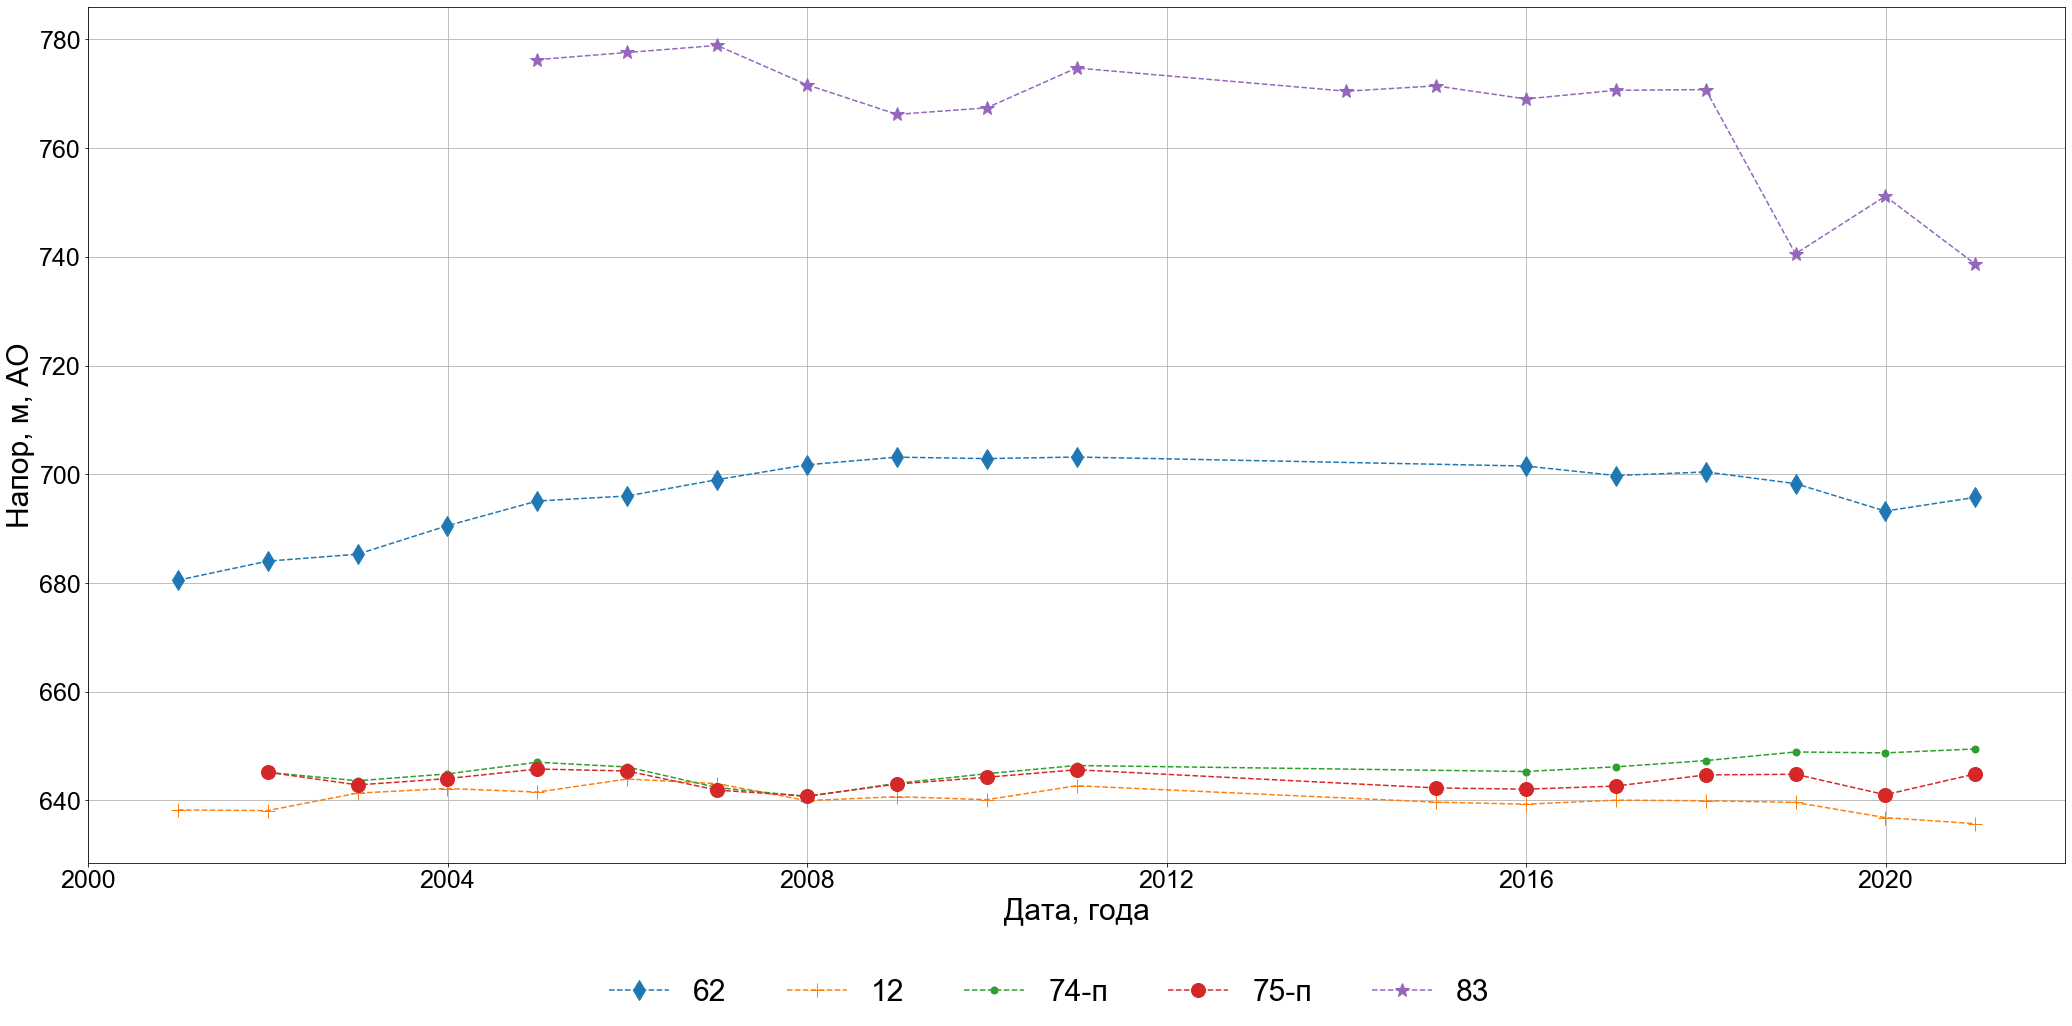

In [26]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 30,
       'xtick.labelsize': 25,
       'ytick.labelsize': 25,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [90/2.54, 40/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       'axes.grid' : True
       }
rcParams.update(params)
#wellnumbers = [72222002,72620001,72620005,72620012,72620018,72620020,72620022]
#wellnames = ['62','1-Б','12','33','74-п','75-п','83']
wellnumbers = [72222002,72620005,72620018,72620020,72620022]
wellnames = ['62','12','74-п','75-п','83']
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
debit= pd.DataFrame()
napor_sum= pd.DataFrame()

marker = itertools.cycle(("d", '+', '.', 'o', '*','D',"^","h",'X','H')) 
for a in range(0,len(wellnumbers)):
    print(wellnumbers[a])
    well = df_dyn[df_dyn['IDPN'] == wellnumbers[a]]
    well_new= pd.DataFrame(well['ДАТА'])
    well_new['Напор'] = well['Напор_(АО)_(метры)_ID_7073']
    well_new = well_new[well_new['Напор'].notna()]
    well_new = well_new.resample('Y',on = 'ДАТА').mean()
    well_new = well_new[well_new['Напор'].notna()]
    ax1.plot(well_new['Напор'],'--',marker = next(marker),label=wellnames[a],zorder=10,markersize=14)
    napor_sum[str(str('Напор, АО, м, скв ')+ str(wellnames[a])).replace("-",'')] = well_new['Напор']
ax1.legend(frameon=False,mode = "expend",ncol=5, bbox_to_anchor=(0.25,-0.2), loc="lower left") 
ax1.set_ylabel('Напор, м, АО', color = "Black")
ax1.set_xlabel('Дата, года', color = "Black")

In [34]:
napor_sum#['ДАТА']

,"Напор, АО, м, скв 62","Напор, АО, м, скв 12","Напор, АО, м, скв 74п","Напор, АО, м, скв 75п","Напор, АО, м, скв 83"
ДАТА,,,,,
2000-12-31,680.509995,638.250000,NaN,NaN,NaN
2001-12-31,684.017765,638.128204,645.151286,645.189188,NaN
2002-12-31,685.291803,641.344735,643.617712,642.851513,NaN
2003-12-31,690.537777,642.189466,644.876244,644.007059,NaN
2004-12-31,695.084241,641.536663,647.019475,645.776052,776.278569
2005-12-31,696.004665,643.939695,646.153895,645.412503,777.592122
2006-12-31,699.001766,643.084502,642.364721,641.893889,778.886464
2007-12-31,701.740354,639.957693,640.707928,640.792754,771.659627
2008-12-31,703.144998,640.685999,643.143331,643.005623,766.204667


In [37]:
napor_sum.index = napor_sum.index.year

In [38]:
napor_sum

,"Напор, АО, м, скв 62","Напор, АО, м, скв 12","Напор, АО, м, скв 74п","Напор, АО, м, скв 75п","Напор, АО, м, скв 83"
ДАТА,,,,,
2000,680.509995,638.250000,NaN,NaN,NaN
2001,684.017765,638.128204,645.151286,645.189188,NaN
2002,685.291803,641.344735,643.617712,642.851513,NaN
2003,690.537777,642.189466,644.876244,644.007059,NaN
2004,695.084241,641.536663,647.019475,645.776052,776.278569
2005,696.004665,643.939695,646.153895,645.412503,777.592122
2006,699.001766,643.084502,642.364721,641.893889,778.886464
2007,701.740354,639.957693,640.707928,640.792754,771.659627
2008,703.144998,640.685999,643.143331,643.005623,766.204667


In [39]:
napor_sum.to_csv(r'D:\Kortunov\transfer\Esentuk\monitoring.csv', index=True,sep = ';'
          )  